# Лабораторная работа №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

**Задание 1. Indian liver pations records.**

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2. Оценить объемы выборок пациентов обоих групп.

In [39]:
data[data['Dataset'] == 1]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1


In [40]:
data[data['Dataset'] == 2]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
12,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.90,2
15,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,2
17,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2
...,...,...,...,...,...,...,...,...,...,...,...
551,29,Male,1.2,0.4,160,20,22,6.2,3.0,0.90,2
564,38,Female,0.6,0.1,165,22,34,5.9,2.9,0.90,2
566,50,Female,1.0,0.3,191,22,31,7.8,4.0,1.00,2
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2


Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [9]:
from scipy.stats import pearsonr
import statistics
Direct_Bilirubin=data['Direct_Bilirubin']
Total_Bilirubin=data['Total_Bilirubin']
data[['Direct_Bilirubin', 'Total_Bilirubin']].cov()
15.252836/(statistics.pstdev(Direct_Bilirubin)*statistics.pstdev(Total_Bilirubin))

0.8761207374582995

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

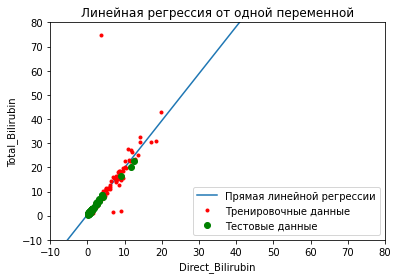

In [16]:
Direct_Bilirubin = np.array(Direct_Bilirubin).reshape(-1,1)
Total_Bilirubin = np.array(Total_Bilirubin).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Direct_Bilirubin,
    Total_Bilirubin,
    test_size = 0.2
)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-10,80)
plt.ylim(-10,80)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Посчитать квантилей 10%, 25%, 50%, 75% для колонок Age, Direct_Bilirubin и Total_Bilirubin таблицы data

Пример, как считать квантили:

In [19]:
age = data['Age']
Direct_Bilirubin=data['Direct_Bilirubin']
Total_Bilirubin=data['Total_Bilirubin']

In [22]:
print("Q2 квантиль ряда 10% Age: ", np.quantile(age, .10))  
print("Q2 квантиль ряда 10% : Direct_Bilirubin", np.quantile(Direct_Bilirubin, .10))  
print("Q2 квантиль ряда 10% : Total_Bilirubin", np.quantile(Total_Bilirubin, .10))
print("Q2 квантиль ряда 25% : ", np.quantile(age, .10))  
print("Q2 квантиль ряда 25% Age: ", np.quantile(age, .25))  
print("Q2 квантиль ряда 25% : Direct_Bilirubin", np.quantile(Direct_Bilirubin, .25))  
print("Q2 квантиль ряда 25% : Total_Bilirubin", np.quantile(Total_Bilirubin, .25)) 
print("Q2 квантиль ряда 50% Age: ", np.quantile(age, .5))  
print("Q2 квантиль ряда 50% : Direct_Bilirubin", np.quantile(Direct_Bilirubin, .5))  
print("Q2 квантиль ряда 50% : Total_Bilirubin", np.quantile(Total_Bilirubin, .5)) 
print("Q2 квантиль ряда 75% Age: ", np.quantile(age, .75))  
print("Q2 квантиль ряда 75% : Direct_Bilirubin", np.quantile(Direct_Bilirubin, .75))  
print("Q2 квантиль ряда 75% : Total_Bilirubin", np.quantile(Total_Bilirubin, .75))

Q2 квантиль ряда 10% Age:  23.0
Q2 квантиль ряда 10% : Direct_Bilirubin 0.1
Q2 квантиль ряда 10% : Total_Bilirubin 0.7
Q2 квантиль ряда 25% :  23.0
Q2 квантиль ряда 25% Age:  33.0
Q2 квантиль ряда 25% : Direct_Bilirubin 0.2
Q2 квантиль ряда 25% : Total_Bilirubin 0.8
Q2 квантиль ряда 50% Age:  45.0
Q2 квантиль ряда 50% : Direct_Bilirubin 0.3
Q2 квантиль ряда 50% : Total_Bilirubin 1.0
Q2 квантиль ряда 75% Age:  58.0
Q2 квантиль ряда 75% : Direct_Bilirubin 1.3
Q2 квантиль ряда 75% : Total_Bilirubin 2.6


Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квантиль 0.5 в данных выборках. Чем они отличаются?

Text(0.5, 1.0, 'Direct_Bilirubin среди людей возрастом до 50 лет')

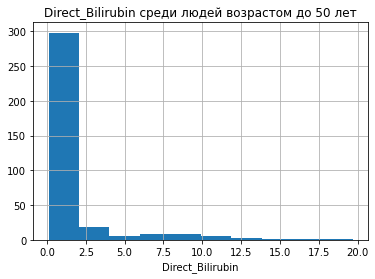

In [54]:
df1=data[age<50]
df2=data[age>=50]
df1['Direct_Bilirubin'].hist()
plt.xlabel('Direct_Bilirubin')
plt.title('Direct_Bilirubin среди людей возрастом до 50 лет')

Text(0.5, 1.0, 'Direct_Bilirubin среди людей после 50 лет')

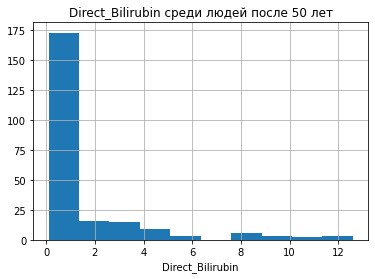

In [56]:
df2['Direct_Bilirubin'].hist()
plt.xlabel('Direct_Bilirubin')
plt.title('Direct_Bilirubin среди людей после 50 лет')

In [67]:
df1=data[age<50]
df2=data[age>=50]
print("Среднее значение до 50",statistics.mean(df1['Direct_Bilirubin']))
print("Среднее значение после 50",statistics.mean(df2['Direct_Bilirubin']))
print("Q2 квантиль ряда 50% до 50 лет: ", np.quantile(df1['Direct_Bilirubin'], .50)) 
print("Q2 квантиль ряда 50% после 50 лет: ", np.quantile(df2['Direct_Bilirubin'], .50)) 

Среднее значение до 50 1.4946175637393768
Среднее значение после 50 1.4730434782608697
Q2 квантиль ряда 50% до 50 лет:  0.3
Q2 квантиль ряда 50% после 50 лет:  0.4


50% людей в возрасте до 50 лет имеют значение Direct_Bilirubin не более 0.3, люди же в возрасте после 50 лет имеют значение данного показателя не более 0.4

Посчитать одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных  - 1). Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

In [114]:
from scipy.stats import ttest_ind
dfb=data[data['Dataset'] == 1]
dfz=data[data['Dataset'] == 2]
d=max(dfb['Total_Bilirubin'])
f_sr=statistics.mean(dfb['Total_Bilirubin'])
sr_kv=statistics.pstdev(dfb['Total_Bilirubin'])
tb=abs(d-f_sr)/sr_kv
print(tb)

9.926178678382815


одновыборочный t-критерий у больных людей больше 1,95, отвергаем принять гипотезу о схожести данного показателя у больных людей. 

In [118]:
ttest=ttest_ind(dfz['Total_Bilirubin'],dfb['Total_Bilirubin'],equal_var=False)
print(ttest)

Ttest_indResult(statistic=-8.421698484724248, pvalue=4.912009195561839e-16)


pvalue меньше уровня значимости, значит выборки достоверно отличающиеся 

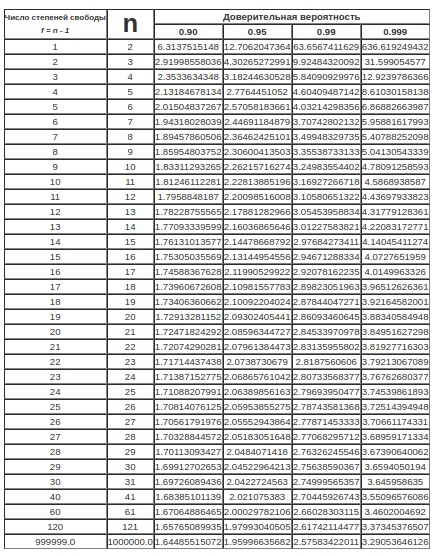

In [ ]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

**Задание 2. AUTO.CSV**
1. Загрузить файл auto.csv
2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis, что можно сказать о типе распределения?
5. Визуализировать несколько взаимосвязей между переменными
6. Выдвинуть несколько гипотез (2-3) по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

df=pd.read_csv("auto.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [76]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [79]:
X = df.iloc[:,:26]

In [80]:
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [81]:
np.round_(X.corr(), decimals=2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.50,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.50,1.00,-0.03,0.05,0.12,-0.33,0.15,0.17,0.01,0.04,-0.15,0.27,0.23,-0.29,-0.26,0.20
wheel-base,-0.53,-0.03,1.00,0.87,0.80,0.59,0.78,0.57,0.50,0.16,0.25,0.30,-0.36,-0.47,-0.54,0.57
length,-0.36,0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.70,0.68
width,-0.23,0.12,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.60,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1.00,0.30,0.07,0.20,-0.04,0.26,-0.11,-0.32,-0.05,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.80,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.60,0.21,0.03,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.01,0.50,0.61,0.56,0.20,0.65,0.60,1.00,-0.05,0.01,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.04,0.16,0.13,0.18,-0.04,0.17,0.21,-0.05,1.00,0.19,0.16,-0.05,-0.03,-0.04,0.08


In [82]:
X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.50,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.50,1.00,-0.03,0.05,0.12,-0.33,0.15,0.17,0.01,0.04,-0.15,0.27,0.23,-0.29,-0.26,0.20
wheel-base,-0.53,-0.03,1.00,0.87,0.80,0.59,0.78,0.57,0.50,0.16,0.25,0.30,-0.36,-0.47,-0.54,0.57
length,-0.36,0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.70,0.68
width,-0.23,0.12,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.60,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1.00,0.30,0.07,0.20,-0.04,0.26,-0.11,-0.32,-0.05,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.80,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.60,0.21,0.03,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.01,0.50,0.61,0.56,0.20,0.65,0.60,1.00,-0.05,0.01,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.04,0.16,0.13,0.18,-0.04,0.17,0.21,-0.05,1.00,0.19,0.16,-0.05,-0.03,-0.04,0.08


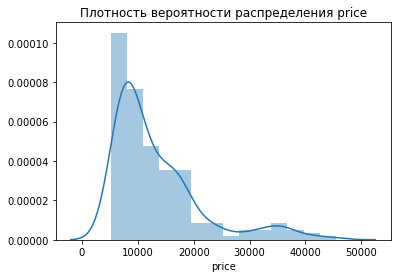

In [83]:
price = df['price']
sns.distplot(price)
plt.title('Плотность вероятности распределения price')
plt.show()

Если не учитывать анамально высокие значения цены на автомобили, то схоже с типом распредения Стьюдента.

In [87]:
stats.skew(price, axis=0, bias=True)

1.7534486514523662

In [89]:
stats.kurtosis(price, axis=0, fisher=True, bias=True)

2.848082544390688

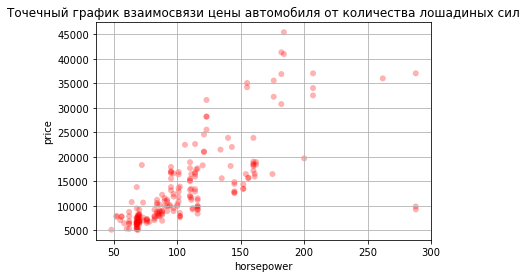

In [92]:
duration=df['horsepower']
votes = df['price']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Точечный график взаимосвязи цены автомобиля от количества лошадиных сил')
plt.show()

Text(0.5, 1.0, 'Зависимость средней цены автомобилей от марки производителя')

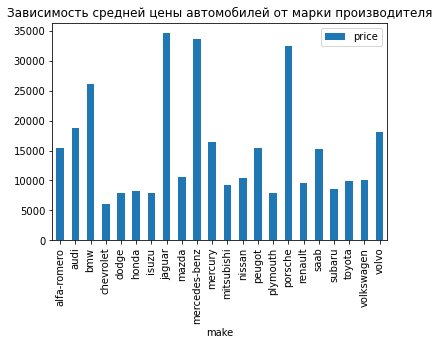

In [100]:
df[['make','price']].groupby('make').mean().plot.bar()
plt.title('Зависимость средней цены автомобилей от марки производителя')

Text(0.5, 1.0, 'Зависимость средней цены автомобилей от типа кузова')

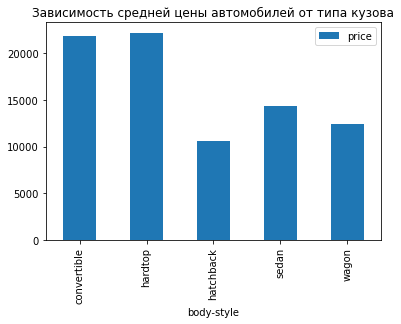

In [120]:
df[['body-style','price']].groupby('body-style').mean().plot.bar()
plt.title('Зависимость средней цены автомобилей от типа кузова')

Различия по количеству лошадиных сил у машин с типами кузова седан и хетчбек. Alpha=0.05
Значение pvalue больше уровня значимости, поэтому нельзя судить о достоверности отлчий между выборками. 

In [131]:
df1=df[df['body-style']=='sedan']
df2=df[df['body-style']=='hatchback']
ttest=ttest_ind(df1['horsepower'],df2['horsepower'],equal_var=False)
print(ttest)

Ttest_indResult(statistic=-0.13046799757172806, pvalue=0.8964053109053314)


Различия по объему двигателя у машин с типами кузова  кузова седан и хетчбек.
Значение pvalue меньше уровня значимости, значит можно утверждать, что значения двух выборок достоверно отличаются. 

In [133]:
df1=df[df['body-style']=='sedan']
df2=df[df['body-style']=='hatchback']
ttest=ttest_ind(df1['engine-size'],df2['engine-size'],equal_var=False)
print(ttest)

Ttest_indResult(statistic=2.768307072305679, pvalue=0.006285565900690813)
